In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.svm import SVC

# metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

RANDOM_SEED = 20240421

In [8]:
data = load_iris()
print(data['DESCR'])
features = pd.DataFrame(data['data'], columns=data['feature_names'])
target = pd.Series([data['target_names'][i] for i in data['target']], name='target')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


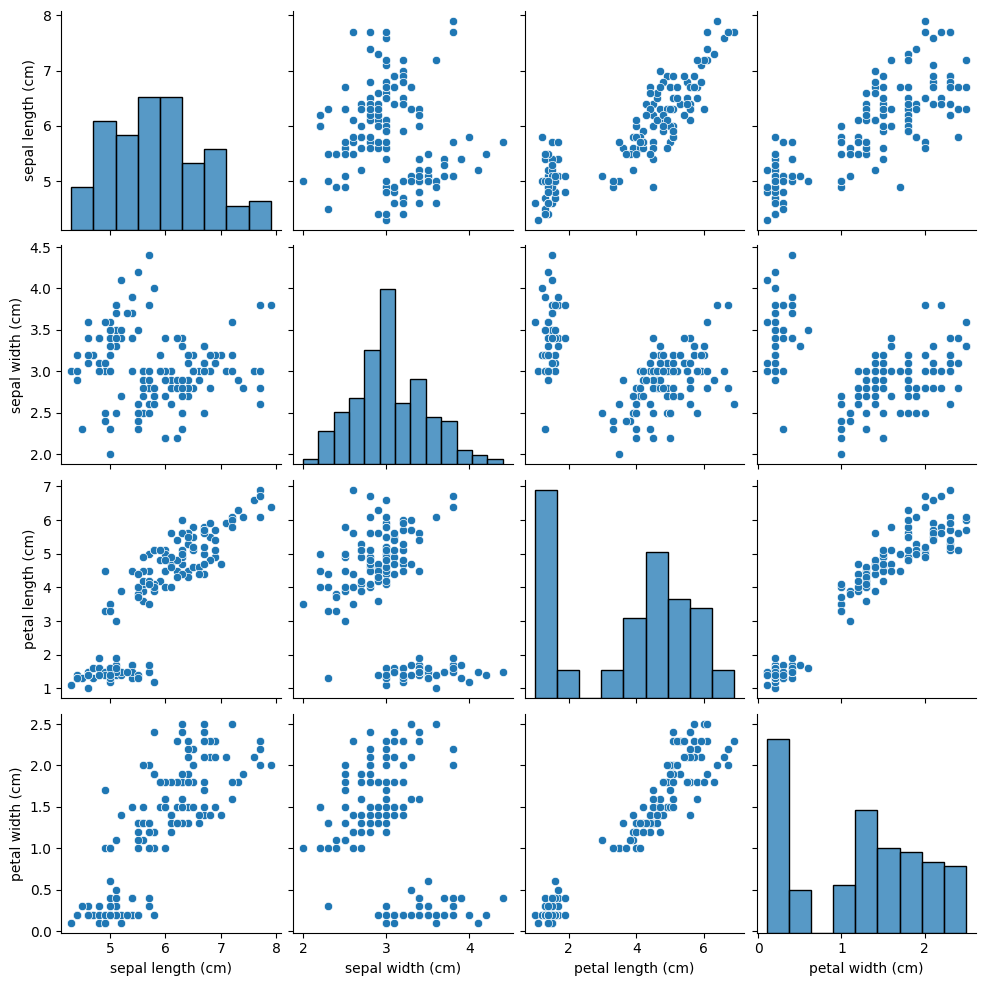

In [10]:
sns.pairplot(features)

In [23]:
target_encoder = LabelEncoder()
targets = target_encoder.fit_transform(target.values)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features.values, targets,
                                                     test_size=0.2, random_state=RANDOM_SEED)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [28]:
def plot_samples(X, y):
    fig, axs = plt.subplots(nrows=4, ncols=4)

    colors = ['red', 'blue', 'green']

    for i in range(4):
        for j in range(4):
            for k in np.unique(y):
                axs[i%4, j%4].plot(X[y==k, i], X[y==k, j], 'o', 
                                   label='class {}'.format(k), color = colors[k])
                
                axs[i%4, j%4].legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')

    fig.set_size_inches(18.5, 10.5)
    plt.show()

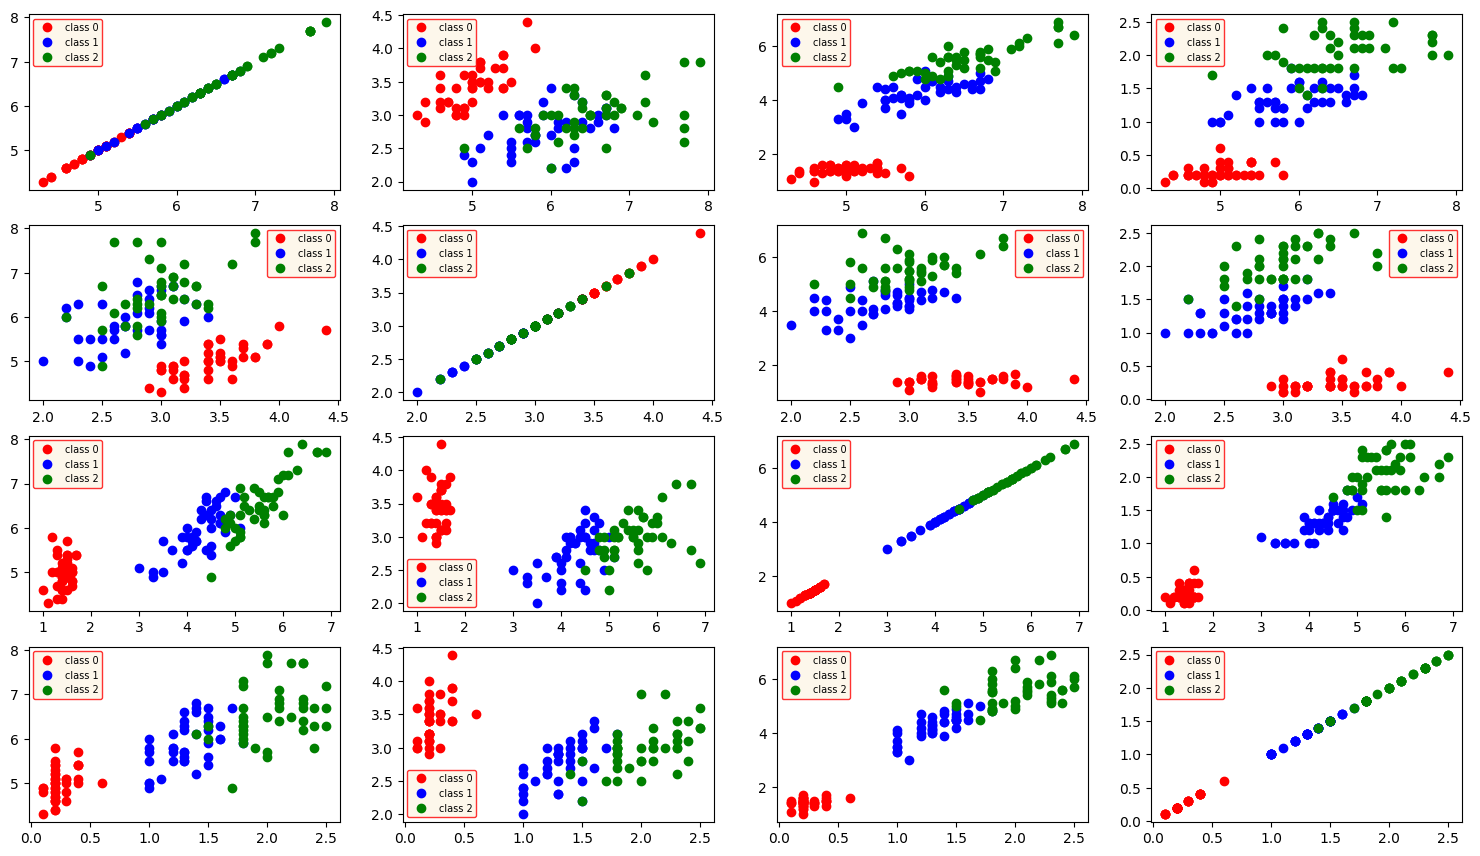

In [29]:
plot_samples(X_train, y_train)

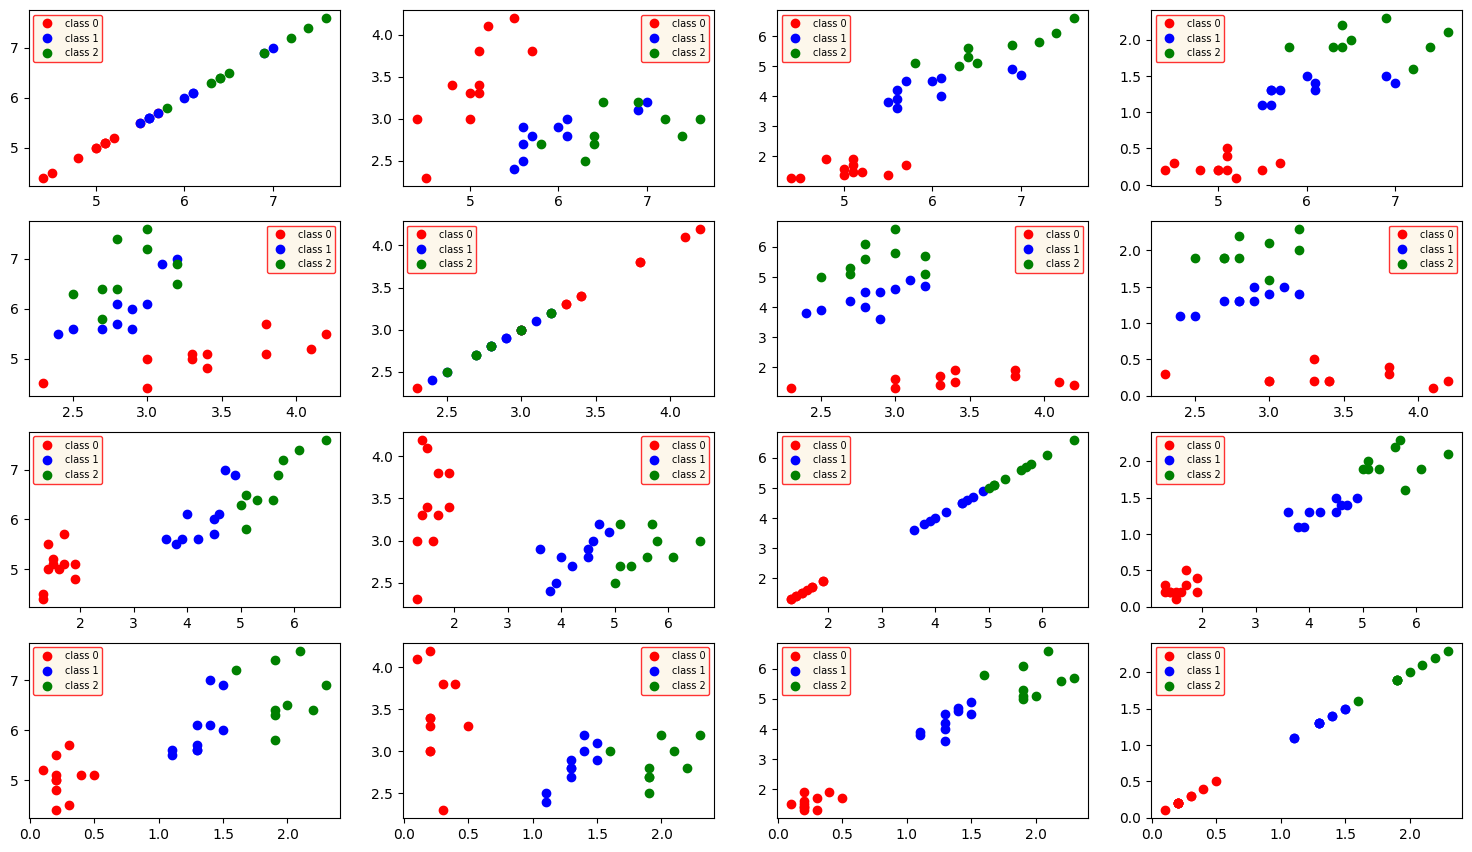

In [30]:
plot_samples(X_test, y_test)

---
training

In [32]:
svc = SVC(kernel='linear',
          random_state=RANDOM_SEED)

svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=20240421)

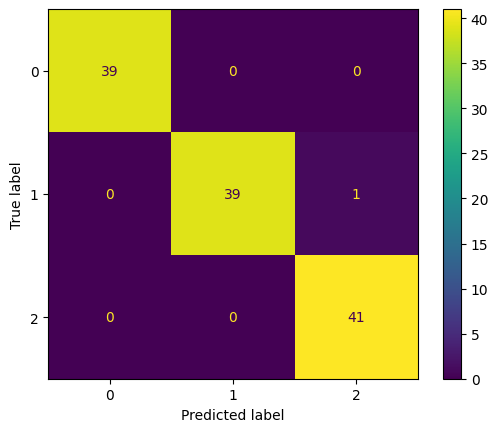

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        41

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [34]:
prediction = svc.predict(X_train)
cm = confusion_matrix(y_train, prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(classification_report(y_train, prediction))

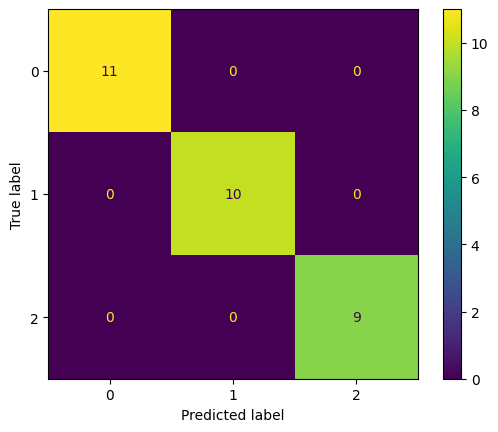

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
prediction = svc.predict(X_test)
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(classification_report(y_test, prediction))

In [47]:
svc.coef_.shape, svc.intercept_

((3, 4), array([1.44826906, 1.24459141, 6.60830121]))

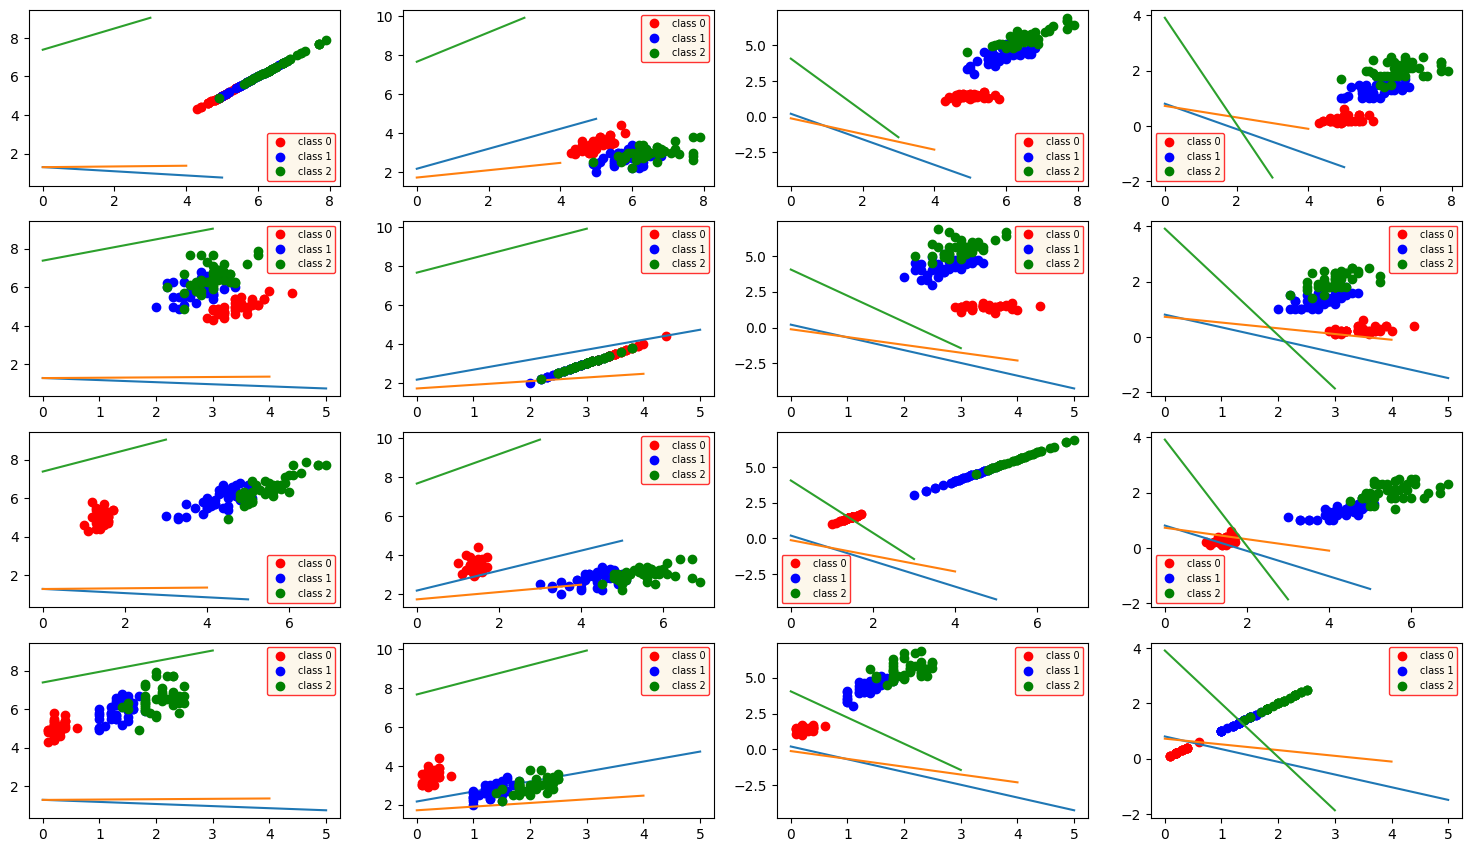

In [82]:
X, y = X_train, y_train

fig, axs = plt.subplots(nrows=4, ncols=4)

colors = ['red', 'blue', 'green']

for i in range(4):
    for j in range(4):
        for k in np.unique(y):
            axs[i%4, j%4].plot(X[y==k, i], X[y==k, j], 'o', 
                                label='class {}'.format(k), color = colors[k])
            axs[i%4, j%4].plot([svc.intercept_[k] + svc.coef_[k][j]*m for m in np.arange(min(X[k, :]), max(X[k, :]))])
            axs[i%4, j%4].legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')

fig.set_size_inches(18.5, 10.5)
plt.show()